In [1]:
import torch
import pandas as pd
import numpy as np

torch.cuda.is_available()

True

In [2]:
torch.cuda.device_count()

1

In [3]:
torch.cuda.current_device()

0

In [4]:
torch.cuda.device(0)

In [5]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 2070'

In [6]:
#train = pd.read_csv('Positive Game Review Data.csv')
#train_tensor = torch.tensor(train.to_numpy())

# read in the data
starting_pos_train_data = np.genfromtxt("Positive_Game_Review_Data.csv", delimiter=",")
# drop the headers
edited_pos_train_data = np.delete(starting_pos_train_data, 0, 0)
# drop the column of names
edited_pos_train_data = np.delete(edited_pos_train_data, 1, 1)
# drop the column of ids
edited_pos_train_data = np.delete(edited_pos_train_data, 0, 1)
# get all the rows where the tag is action (the last column == 1)
clipped_pos_1_train_data = edited_pos_train_data[np.where(edited_pos_train_data[:,4] == 1)]
# drop that tag row and the player count and hours played rows
cleaned_pos_1_train_data = clipped_pos_1_train_data[:, [2,3]]

starting_neg_train_data = np.genfromtxt("Negative_Game_Review_Data.csv", delimiter=",")
edited_neg_train_data = np.delete(starting_neg_train_data, 0, 0)
edited_neg_train_data = np.delete(edited_neg_train_data, 1, 1)
edited_neg_train_data = np.delete(edited_neg_train_data, 0, 1)
clipped_neg_1_train_data = edited_neg_train_data[np.where(edited_neg_train_data[:,4] == 1)]
cleaned_neg_1_train_data = clipped_neg_1_train_data[:, [2,3]]

cleaned_train_1_data = np.concatenate((cleaned_pos_1_train_data, cleaned_neg_1_train_data), axis=0)

# to tensor
train_tensor_1 = torch.from_numpy(cleaned_train_1_data)
train_tensor_1

tensor([[8.0000e+00, 2.6166e+04],
        [5.0000e+00, 2.0778e+04],
        [5.0000e+00, 2.8813e+05],
        [7.0000e+00, 1.9321e+05],
        [8.0000e+00, 2.7733e+05],
        [5.0000e+00, 5.1858e+04],
        [5.0000e+00, 8.6110e+04],
        [5.0000e+00, 4.0104e+04],
        [9.0000e+00, 1.7452e+05],
        [5.0000e+00, 3.9795e+04],
        [5.0000e+00, 7.4772e+04],
        [5.0000e+00, 2.3891e+05],
        [7.0000e+00, 4.0077e+04],
        [6.0000e+00, 2.0268e+05],
        [8.0000e+00, 9.6443e+04],
        [8.0000e+00, 2.9594e+05],
        [8.0000e+00, 2.8595e+05],
        [6.0000e+00, 2.7398e+05],
        [6.0000e+00, 2.2946e+05],
        [8.0000e+00, 9.1274e+04],
        [9.0000e+00, 2.2653e+05],
        [7.0000e+00, 2.3280e+05],
        [5.0000e+00, 1.4507e+05],
        [5.0000e+00, 2.2238e+05],
        [5.0000e+00, 1.5858e+05],
        [6.0000e+00, 1.6034e+05],
        [9.0000e+00, 2.0128e+05],
        [5.0000e+00, 2.7981e+05],
        [7.0000e+00, 2.3150e+05],
        [6.000

In [18]:
torch.count_nonzero(train_tensor_1, dim=0)

tensor([374, 374])

In [7]:
from kmeans_pytorch import kmeans

num_clusters = 9

# kmeans
cluster_ids_x, cluster_centers = kmeans(
    X=train_tensor_1, num_clusters=num_clusters, distance='euclidean', device=torch.device('cuda:0')
)

running k-means on cuda:0..


[running kmeans]: 7it [00:00, 124.64it/s, center_shift=0.000000, iteration=7, tol=0.000100]       


In [8]:
cluster_ids_x

tensor([8, 8, 0, 2, 0, 4, 7, 8, 3, 8, 4, 1, 8, 2, 7, 0, 0, 0, 1, 7, 1, 1, 5, 1,
        3, 3, 2, 0, 1, 2, 6, 2, 8, 4, 8, 1, 0, 4, 7, 7, 3, 0, 5, 4, 0, 4, 0, 8,
        6, 7, 8, 1, 2, 1, 5, 7, 7, 1, 6, 0, 7, 2, 5, 8, 5, 6, 0, 0, 2, 0, 8, 2,
        1, 3, 3, 8, 5, 6, 3, 5, 1, 5, 1, 3, 1, 2, 7, 4, 7, 0, 1, 7, 0, 1, 5, 4,
        2, 7, 6, 3, 0, 8, 5, 7, 3, 2, 7, 2, 1, 4, 2, 1, 0, 4, 0, 4, 0, 1, 5, 5,
        1, 2, 2, 1, 0, 2, 3, 8, 8, 8, 3, 4, 4, 3, 2, 5, 2, 2, 0, 5, 4, 3, 1, 2,
        4, 2, 5, 7, 7, 5, 8, 0, 5, 1, 1, 7, 0, 7, 1, 6, 5, 5, 3, 0, 6, 8, 5, 3,
        2, 2, 3, 1, 2, 1, 7, 7, 3, 3, 8, 6, 2, 3, 1, 0, 7, 3, 1, 2, 7, 4, 4, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

In [9]:
cluster_centers

tensor([[7.1154e+00, 2.7947e+05],
        [6.9655e+00, 2.3632e+05],
        [7.0370e+00, 1.9839e+05],
        [5.9524e+00, 1.6659e+05],
        [7.3529e+00, 5.9203e+04],
        [7.3500e+00, 1.3052e+05],
        [2.7031e+00, 5.4279e+03],
        [7.0000e+00, 9.5131e+04],
        [6.3684e+00, 3.2688e+04]])

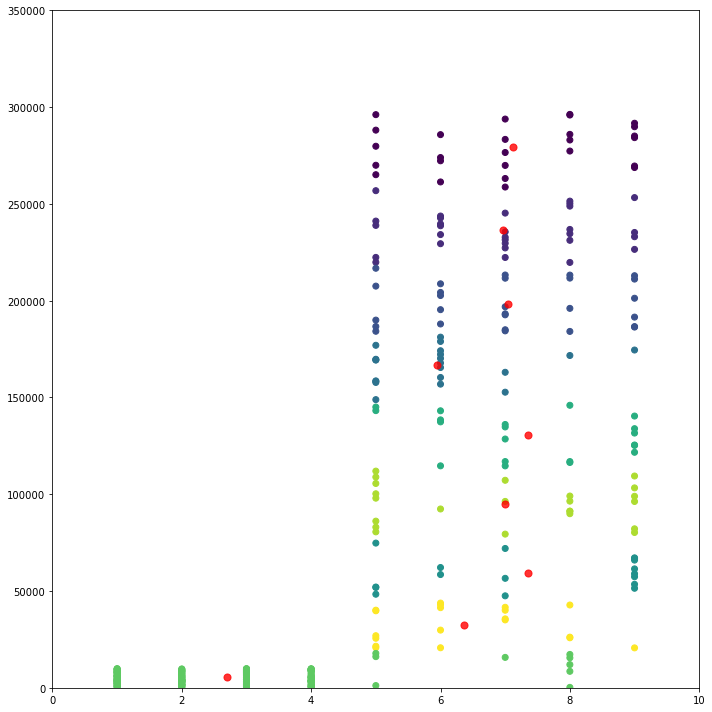

In [29]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(train_tensor_1[:,0], train_tensor_1[:,1], c=cluster_ids_x)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c="red", s=50, alpha=0.8)
plt.axis([0, 10, 0, 350000])
plt.tight_layout()
plt.show()

In [30]:
# Save centers in a csv
cluster_centers_1_np = cluster_centers.numpy()
cluster_centers_1_df = pd.DataFrame(cluster_centers_1_np)
cluster_centers_1_df.to_csv('cluster_centers_1.csv')